Epoch 1/100
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 2s 795us/step - loss: 0.0656 - val_loss: 0.0123
Epoch 2/100
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - loss: 0.0104 - val_loss: 0.0072
Epoch 3/100
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - loss: 0.0069 - val_loss: 0.0054
Epoch 4/100
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - loss: 0.0052 - val_loss: 0.0043
Epoch 5/100
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - loss: 0.0041 - val_loss: 0.0035
Epoch 6/100
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - loss: 0.0033 - val_loss: 0.0030
Epoch 7/100
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - loss: 0.0028 - val_loss: 0.0025
Epoch 8/100
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - loss: 0.0024 - val_loss: 0.0022
Epoch 9/100
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - loss: 0.0020 - val_loss: 0.0018
Epoch 10/100
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 11/100
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - loss: 0.0015 - val_loss: 0.00

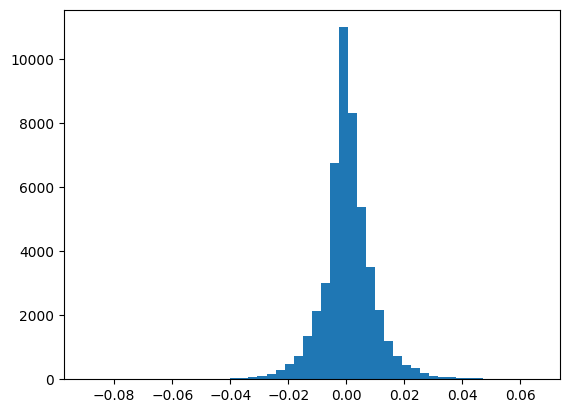

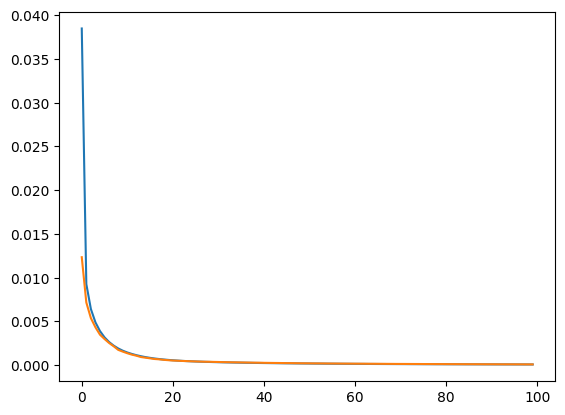

                    count       mean        std           min        25%  \
days_to_maturity  48960.0  48.222222  32.906863  7.000000e+00  28.000000   
fixing_frequency  48960.0  31.111111  29.719151  7.000000e+00   7.000000   
past_fixings      48960.0   0.000000   0.000000  0.000000e+00   0.000000   
risk_free_rate    48960.0   0.001423   0.000300  9.130000e-04   0.001118   
dividend_rate     48960.0   0.020948   0.000678  1.940600e-02   0.020492   
kappa             48960.0   6.394031   9.589880  3.507254e-09   0.508730   
theta             48960.0   0.110530   0.156167  1.896277e-09   0.027733   
rho               48960.0  -0.765482   0.125227 -1.000000e+00  -0.817346   
eta               48960.0   1.714866   1.653676  2.442695e-01   0.600478   
v0                48960.0   0.075768   0.095748  1.108277e-04   0.017708   
relative_spot     48960.0   1.160280   0.476516  6.666667e-01   0.800000   

                        50%        75%        max  
days_to_maturity  28.000000  84.000

In [1]:
from testing_keras import tictoc, dataset, development_dates, \
    test_dates, train_data, test_data, train_X, test_X, train_y, \
        test_y, normalizer, build_and_compile_model, mlp, pricename

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
insample = mlp.predict(train_X).flatten()
insample_error = insample-train_y
insample_MAE = np.mean(np.abs(insample_error))
insample_RMSE = np.sqrt(np.mean(insample_error**2))
print(f"in-sample:\n   MAE: {insample_MAE}\n   RMSE: {insample_RMSE}")

1530/1530 ━━━━━━━━━━━━━━━━━━━━ 1s 576us/step
in-sample:
   MAE: 0.006284310138965407
   RMSE: 0.00914296700452725


In [4]:
outsample = mlp.predict(test_X).flatten()
outsample_error = outsample-test_y
outsample_MAE = np.mean(np.abs(outsample_error))
outsample_RMSE = np.sqrt(np.mean(outsample_error**2))
print(f"out-of-sample:\n   MAE: {outsample_MAE}\n   RMSE: {outsample_RMSE}")

9062/9062 ━━━━━━━━━━━━━━━━━━━━ 5s 603us/step
out-of-sample:
   MAE: 0.05280288374855504
   RMSE: 0.11347237304000671


In [5]:
insample_error.index = pd.to_datetime(train_data['date'],format='mixed')
plot0 = np.abs(insample_error.resample('20D').mean())

In [6]:
outsample_error.index = pd.to_datetime(test_data['date'],format='mixed')
plot = np.abs(outsample_error.resample('20D').mean())

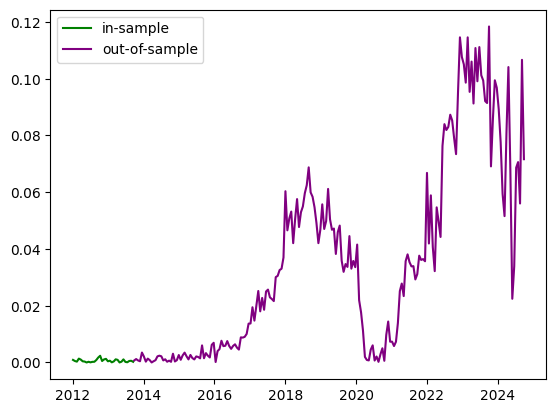

In [7]:
plt.figure()
plt.plot(plot0,color='green',label='in-sample')
plt.plot(plot,color='purple',label='out-of-sample')
plt.legend()
plt.show()